# Python Statistics Essential Training

## Exploring & Visualizing

### 02_01 - Categorical Exploration

Goals:

* Explore a categorical column, such as "MS Zoning," by accessing the column and displaying its unique values.
* Visualize the value counts of a categorical column using a bar chart.
* Visualize the value counts of a categorical column using a horizontal bar chart.

In [4]:
import pandas as pd
url = 'https://github.com/mattharrison/datasets/raw/master/data/ames-housing-dataset.zip'
raw = pd.read_csv(url, engine='pyarrow', dtype_backend='pyarrow')

# make function
def shrink_ints(df):
    mapping = {}
    for col in df.dtypes[df.dtypes=='int64[pyarrow]'].index:
        max_ = df[col].max()
        min_ = df[col].min()
        if min_ < 0:
            continue
        if max_ < 255:
            mapping[col] = 'uint8[pyarrow]'
        elif max_ < 65_535:
            mapping[col] = 'uint16[pyarrow]'
        elif max_ <  4294967295:
            mapping[col] = 'uint32[pyarrow]'
    return df.astype(mapping)


def clean_housing(df):
    return (df
     .assign(**df.select_dtypes('string').replace('', 'Missing').astype('category'),
             **{'Garage Yr Blt': df['Garage Yr Blt'].clip(upper=df['Year Built'].max())})
     .pipe(shrink_ints)
    )    

housing = clean_housing(raw)

In [5]:
housing.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.0,2930.0,2930.0,2440.0,2930.0,2930.0,2930.0,2930.0,2930.0,2907.0,...,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0,2930.0
mean,1465.5,714464496.988737,57.387372,69.22459,10147.921843,6.094881,5.56314,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,188730844.64939,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.4834,64.139059,25.141331,56.08737,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.0,526301100.0,20.0,21.0,1300.0,1.0,1.0,1872.0,1950.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2006.0,12789.0
25%,733.25,528477022.5,20.0,58.0,7440.25,5.0,5.0,1954.0,1965.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2007.0,129500.0
50%,1465.5,535453620.0,50.0,68.0,9436.5,6.0,5.0,1973.0,1993.0,0.0,...,0.0,27.0,0.0,0.0,0.0,0.0,0.0,6.0,2008.0,160000.0
75%,2197.75,907181097.5,70.0,80.0,11555.25,7.0,6.0,2001.0,2004.0,164.0,...,168.0,70.0,0.0,0.0,0.0,0.0,0.0,8.0,2009.0,213500.0
max,2930.0,1007100110.0,190.0,313.0,215245.0,10.0,9.0,2010.0,2010.0,1600.0,...,1424.0,742.0,1012.0,508.0,576.0,800.0,17000.0,12.0,2010.0,755000.0


In [6]:
# categoricals
(housing
  ['MS Zoning'])

0       RL
1       RH
2       RL
3       RL
4       RL
        ..
2925    RL
2926    RL
2927    RL
2928    RL
2929    RL
Name: MS Zoning, Length: 2930, dtype: category
Categories (7, string[pyarrow]): [A (agr), C (all), FV, I (all), RH, RL, RM]

In [7]:
# Display the counts of unique values in the 'MS Zoning' categorical column
(housing
  ['MS Zoning']             # Select the 'MS Zoning' column
  .value_counts()           # Count the occurrences of each unique value in the 'MS Zoning' column
)

MS Zoning
RL         2273
RM          462
FV          139
RH           27
C (all)      25
A (agr)       2
I (all)       2
Name: count, dtype: int64

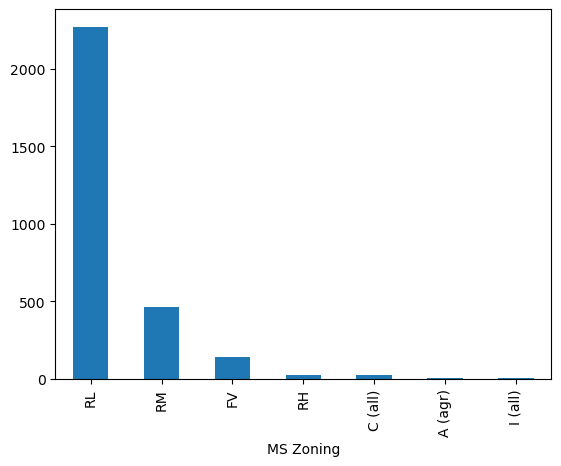

In [8]:
# Display the counts of unique values in the 'MS Zoning' categorical column and plot them as a bar chart
(housing
  ['MS Zoning']             # Select the 'MS Zoning' column
  .value_counts()           # Count the occurrences of each unique value in the 'MS Zoning' column
  .plot.bar());             # Plot the counts as a bar chart

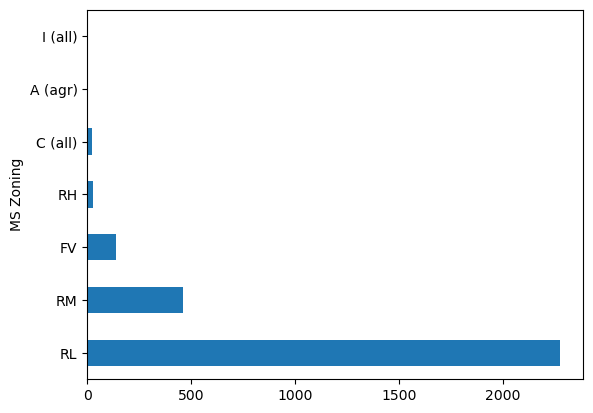

In [9]:
# Display the counts of unique values in the 'MS Zoning' categorical column and plot them as a horizontal bar chart
(housing
  ['MS Zoning']             # Select the 'MS Zoning' column
  .value_counts()           # Count the occurrences of each unique value in the 'MS Zoning' column
  .plot.barh());            # Plot the counts as a horizontal bar chart

### 02_02: Histograms and Distributions

Goals:

* Obtain descriptive statistics of the "SalePrice" column using the `.describe` method.
* Visualize the distribution of the "SalePrice" column using a histogram.
* Customize the histogram by specifying the number of bins using the `bins` parameter.

In [11]:
# Display descriptive statistics for the 'SalePrice' column, which is numerical
(housing
 .SalePrice               # Select the 'SalePrice' column
 .describe()              # Generate descriptive statistics (count, mean, std, min, 25%, 50%, 75%, max)
)

count           2930.0
mean     180796.060068
std       79886.692357
min            12789.0
25%           129500.0
50%           160000.0
75%           213500.0
max           755000.0
Name: SalePrice, dtype: double[pyarrow]

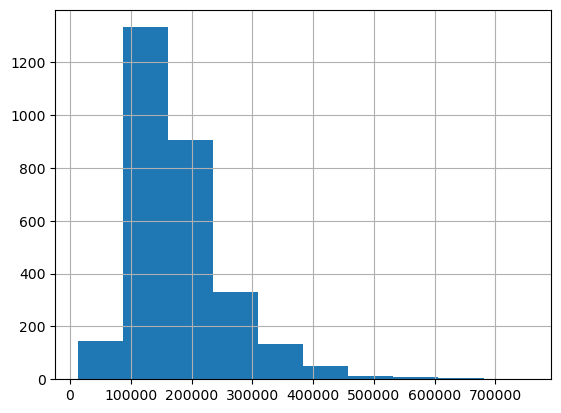

In [12]:
# Plot a histogram of the 'SalePrice' column to visualize its distribution
(housing
 .SalePrice               # Select the 'SalePrice' column
 .hist()                  # Plot a histogram of the 'SalePrice' values
);

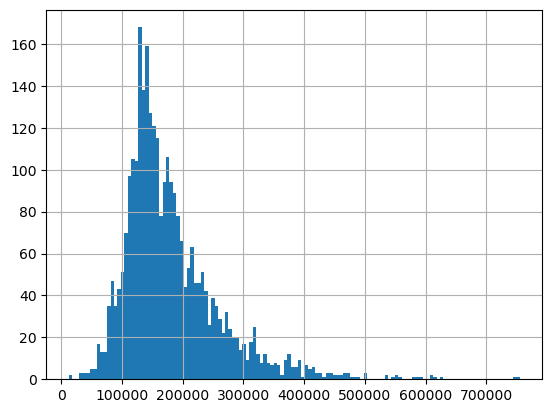

In [13]:
# Plot a histogram of the 'SalePrice' column with 130 bins to visualize its distribution in more detail
(housing
 .SalePrice               # Select the 'SalePrice' column
 .hist(bins=130)          # Plot a histogram with 130 bins for a more detailed view of the distribution
);

### 02_03 - Outliers and Z-scores

Goals:

* Calculate the Z-score for the "SalePrice" column using the `calc_z` function.
* Identify outliers based on the Z-score by assigning a boolean column indicating whether the Z-score is greater than or equal to 3 or less than or equal to -3.
* Identify outliers using the IQR (interquartile range) method by assigning a boolean column indicating whether the values are outside the range of median ± 3 * IQR.


In [15]:
# outlier with Z-score
def calc_z(df, col):
    mean = df[col].mean() 
    std = df[col].std()
    return (df[col]-mean)/std

(housing
 .pipe(calc_z, col='SalePrice')
)

0       0.428156
1      -0.948795
2      -0.110107
3        0.79117
4       0.113961
          ...   
2925    -0.47938
2926   -0.623334
2927   -0.610816
2928   -0.135142
2929    0.090177
Name: SalePrice, Length: 2930, dtype: double[pyarrow]

In [16]:
(housing
 .assign(z_score=calc_z(housing, col='SalePrice'))
 #.query('z_score.abs() >= 3')
 .query('z_score <= -3')
)

C:\Users\lsoares\AppData\Local\Temp\ipykernel_26520\4247316163.py:4: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  .query('z_score <= -3')


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,z_score


In [17]:
def calc_iqr_outlier(df, col):
    ser = df[col]
    iqr = ser.quantile(.75) - ser.quantile(.25)
    med = ser.median()
    small_mask = ser < med-iqr*3
    large_mask = ser > med+iqr*3
    return small_mask | large_mask

housing[
calc_iqr_outlier(housing, 'SalePrice')
]

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
15,16,527216070,60,RL,47,53504,Pave,<NA>,IR2,HLS,...,0,<NA>,<NA>,<NA>,0,6,2010,WD,Normal,538000
44,45,528150070,20,RL,100,12919,Pave,<NA>,IR1,Lvl,...,0,<NA>,<NA>,<NA>,0,3,2010,New,Partial,611657
46,47,528176010,20,RL,110,14300,Pave,<NA>,Reg,HLS,...,0,<NA>,<NA>,<NA>,0,6,2010,WD,Normal,500000
366,367,527214050,20,RL,63,17423,Pave,<NA>,IR1,Lvl,...,0,<NA>,<NA>,<NA>,0,7,2009,New,Partial,501837
421,422,528102140,60,RL,110,14257,Pave,<NA>,Reg,Lvl,...,0,<NA>,<NA>,<NA>,0,6,2009,WD,Normal,462000
422,423,528104070,60,RL,104,13518,Pave,<NA>,Reg,Lvl,...,0,<NA>,<NA>,<NA>,0,7,2009,New,Partial,485000
423,424,528106020,20,RL,105,15431,Pave,<NA>,Reg,Lvl,...,0,<NA>,<NA>,<NA>,0,4,2009,WD,Normal,555000
431,432,528110010,60,RL,97,13478,Pave,<NA>,IR1,Lvl,...,0,<NA>,<NA>,<NA>,0,6,2009,ConLI,Normal,451950
432,433,528110020,20,RL,105,13693,Pave,<NA>,Reg,Lvl,...,0,<NA>,<NA>,<NA>,0,3,2009,WD,Normal,610000
433,434,528110090,60,RL,107,13891,Pave,<NA>,Reg,Lvl,...,0,<NA>,<NA>,<NA>,0,1,2009,New,Partial,582933


In [18]:
def calc_iqr_outlier(df, col):
    ser = df[col]
    iqr = ser.quantile(.75) - ser.quantile(.25)
    med = ser.median()
    small_mask = ser < med-iqr*3
    large_mask = ser > med+iqr*3
    return small_mask | large_mask

(housing
 .assign(iqr_outlier=calc_iqr_outlier(housing, col='SalePrice'))
 .query('iqr_outlier')
)

C:\Users\lsoares\AppData\Local\Temp\ipykernel_26520\288701225.py:11: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  .query('iqr_outlier')


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,iqr_outlier
15,16,527216070,60,RL,47,53504,Pave,<NA>,IR2,HLS,...,<NA>,<NA>,<NA>,0,6,2010,WD,Normal,538000,True
44,45,528150070,20,RL,100,12919,Pave,<NA>,IR1,Lvl,...,<NA>,<NA>,<NA>,0,3,2010,New,Partial,611657,True
46,47,528176010,20,RL,110,14300,Pave,<NA>,Reg,HLS,...,<NA>,<NA>,<NA>,0,6,2010,WD,Normal,500000,True
366,367,527214050,20,RL,63,17423,Pave,<NA>,IR1,Lvl,...,<NA>,<NA>,<NA>,0,7,2009,New,Partial,501837,True
421,422,528102140,60,RL,110,14257,Pave,<NA>,Reg,Lvl,...,<NA>,<NA>,<NA>,0,6,2009,WD,Normal,462000,True
422,423,528104070,60,RL,104,13518,Pave,<NA>,Reg,Lvl,...,<NA>,<NA>,<NA>,0,7,2009,New,Partial,485000,True
423,424,528106020,20,RL,105,15431,Pave,<NA>,Reg,Lvl,...,<NA>,<NA>,<NA>,0,4,2009,WD,Normal,555000,True
431,432,528110010,60,RL,97,13478,Pave,<NA>,IR1,Lvl,...,<NA>,<NA>,<NA>,0,6,2009,ConLI,Normal,451950,True
432,433,528110020,20,RL,105,13693,Pave,<NA>,Reg,Lvl,...,<NA>,<NA>,<NA>,0,3,2009,WD,Normal,610000,True
433,434,528110090,60,RL,107,13891,Pave,<NA>,Reg,Lvl,...,<NA>,<NA>,<NA>,0,1,2009,New,Partial,582933,True


### 02_04 - Correlations

Goals:

* Calculate the Pearson correlation
* Calculate the Spearman correlation 
* Color a correlation matrix appropriately

In [20]:
# Pearson correlation
housing.corr()

ValueError: could not convert string to float: 'RL'

In [ ]:
housing.corr(numeric_only=True)

In [ ]:
(housing
 .corr(method='spearman', numeric_only=True)
 .style
 .background_gradient()
)

In [ ]:
(housing
 .corr(method='spearman', numeric_only=True)
 .style
 .background_gradient(cmap='RdBu')
)

In [ ]:
(housing
 .corr(method='spearman', numeric_only=True)
 .style
 .background_gradient(cmap='RdBu', vmin=-1, vmax=1)
)

### 02_05 - Scatter Plots

Goals:

* Create a scatter plot
* Set transparency
* Jitter plot values

In [ ]:
(housing
 .plot
 .scatter(x='Year Built', y='Overall Cond')
)

In [ ]:
housing['Year Built'].corr(housing['Overall Cond'], method='spearman')

In [ ]:
(housing
 .plot
 .scatter(x='Year Built', y='Overall Cond', alpha=.1)
)

In [ ]:
# with jitter in y
(housing
 .assign(**{'Overall Cond': housing['Overall Cond'] + np.random.random(len(housing))*.8 -.4})
 .plot
 .scatter(x='Year Built', y='Overall Cond', alpha=.1)
)

In [ ]:
# make function
def jitter(df_, col, amount=.5):
    return (df_
            [col] + np.random.random(len(df_))*amount - (amount/2))
    
(housing
 .assign(#**{'Overall Cond': housing['Overall Cond'] + np.random.random(len(housing))*.8 -.4})
     **{'Overall Cond': jitter(housing, 'Overall Cond', amount=.8)})
 .plot
 .scatter(x='Year Built', y='Overall Cond', alpha=.1)
)

In [ ]:

(housing
 #.assign(**{'Overall Cond': housing['Overall Cond'] + np.random.random(len(housing))*.8 -.4})
 .plot
 .hexbin(x='Year Built', y='Overall Cond', alpha=1, gridsize=18)
)

### 02_06 - Visualizing Categoricals and Numerical Values

Goals:

* Create a box plot of a single column
* Create a box plot of multiple columns
* Use the `.pivot` method
* Use Seaborn to create other distibution plots by category

In [ ]:
# Numerical and categorical
(housing
 #.assign(**{'Overall Cond': housing['Overall Cond'] + np.random.random(len(housing))*.8 -.4})
 .plot
 .box(x='Year Built', y='Overall Cond')
)

In [ ]:
# Make multiple box plots
(housing
 .pivot(columns='Year Built', values='Overall Cond')
 .apply(lambda ser: ser[~ser.isna()].reset_index(drop=True))
 .plot.box()
)

In [ ]:
(housing
 .pivot(columns='Year Built', values='Overall Cond')
 .apply(lambda ser: ser[~ser.isna()].reset_index(drop=True))
 .loc[:, [1900, 1920, 1940, 1960, 1980, 2000]]
 .plot.box()
)

In [ ]:
1993 // 10

In [ ]:
# Group by decade
(housing
 .assign(decade=(housing['Year Built']//10 ) * 10)
 .pivot(columns='decade', values='Overall Cond')
 .apply(lambda ser: ser[~ser.isna()].reset_index(drop=True))
 .plot.box()
)

In [ ]:
# or use seaborn
import seaborn as sns

sns.boxplot(data=housing, x='Year Built', y='Overall Cond')

In [ ]:
sns.boxplot?

In [ ]:
sns.boxplot(data=housing, x='Year Built', y='Overall Cond',
            order=[1900, 1920, 1940]
)

In [ ]:
sns.violinplot(data=housing, x='Year Built', y='Overall Cond',
            order=[1900, 1920, 1940]
)

In [ ]:
sns.boxenplot(data=housing, x='Year Built', y='Overall Cond',
            order=[1900, 1920, 1940]
)

### 02_07 - Comparing Two Categoricals

Goals:


* Create a cross-tabulation 
* Style the cross-tabulation table 
* Explore the documentation of the `.background_gradient` method of pandas styling.
* Create a stacked bar plot of a cross-tabulation

In [ ]:
# 2 Categoricals
housing.dtypes[:40]


In [ ]:
# 2 Categoricals - Cross tabulation
(housing
 .groupby(['Overall Qual', 'Bsmt Cond'])
 .size()
 .unstack()
)

In [ ]:
(pd.crosstab(index=housing['Overall Qual'], columns=housing['Bsmt Cond']))

In [ ]:
(pd.crosstab(index=housing['Overall Qual'], columns=housing['Bsmt Cond'])
 .style
 .background_gradient(cmap='viridis', axis=None)  # None is whole dataframe
)

In [ ]:
raw.style.background_gradient?

In [ ]:
# Reorder
# Ex: Excellent
# Gd: Good
# TA: Typical - slight dampness allowed
# Fa: Fair - dampness or some cracking or settling
# Po: Poor - Severe cracking, settling, or wetness
    
(pd.crosstab(index=housing['Overall Qual'], columns=housing['Bsmt Cond'])
 .loc[:, ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'Missing', 'NA']]
 .style
 .background_gradient(cmap='viridis', axis=None)  # None is whole dataframe
)

In [ ]:
# Reorder
# Ex: Excellent
# Gd: Good
# TA: Typical - slight dampness allowed
# Fa: Fair - dampness or some cracking or settling
# Po: Poor - Severe cracking, settling, or wetness
    
(pd.crosstab(index=housing['Overall Qual'], columns=housing['Bsmt Cond'])
 .loc[:, ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'Missing', 'NA']]
 .plot.bar(stacked=True, 
           cmap='viridis')
)

### 02_08 - Challenge: Explore Ames
* Create a scatter plot of *1st Flr SF* against *SalePrice*

In [ ]:
#02_09 - Solution
